In [1]:
#pip install pydotplus

In [2]:
import pandas as pd
import numpy as np                   #Importing the required libraries fr the project
import matplotlib.pyplot as plt
import joblib

In [3]:
df=pd.read_csv('german_credit_data.csv') #Importing th dataset from local drive 
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [4]:
dataset=pd.read_csv('german_credit_data.csv')

In [5]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [6]:
cols=['Sex','Housing', 'Saving accounts', 'Checking account', 'Purpose']
for i in cols:
    print(df[i].value_counts())                                           #Checking for types of values in the Dataset columns
    

male      690
female    310
Name: Sex, dtype: int64
own     713
rent    179
free    108
Name: Housing, dtype: int64
little        604
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64


In [7]:
#checking for null values

In [8]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     818 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [10]:
df.isnull().any()  #Checking for null values

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [11]:
import seaborn as sns

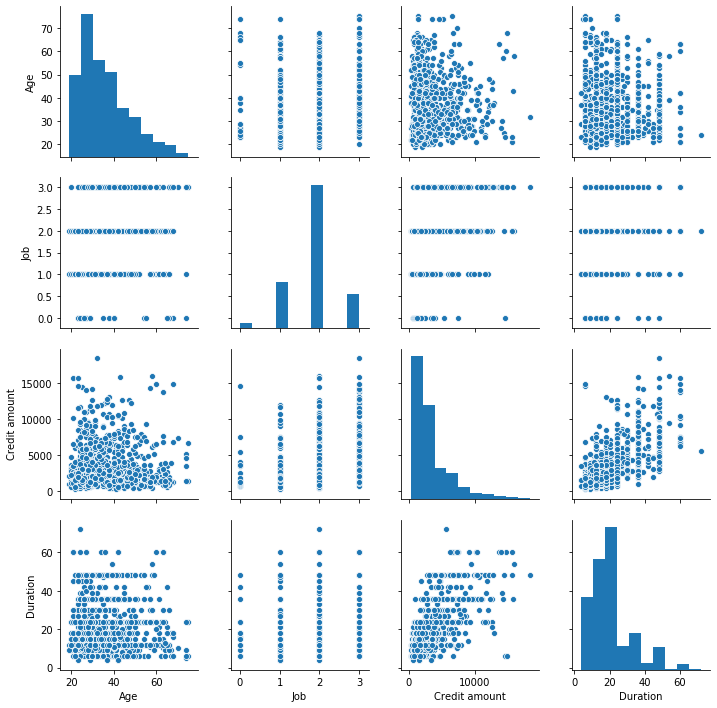

In [12]:
sns.pairplot(df)

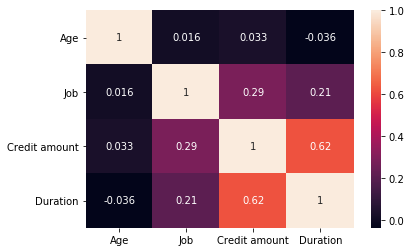

In [13]:
sns.heatmap(df.corr(), annot=True)

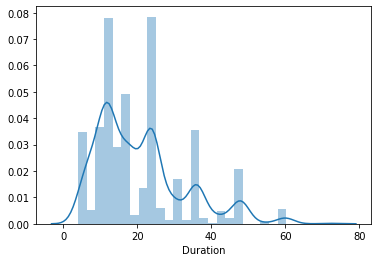

In [14]:
sns.distplot(df['Duration'].dropna())

In [15]:
df['Saving accounts'].fillna(df['Saving accounts'].mode().iloc[0],inplace=True)  #Taking care of categorical null values in Saving accounts 
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,little,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [16]:
df['Checking account'].fillna(df['Checking account'].mode().iloc[0],inplace=True)#Taking care of categorical null values in Checking account


In [17]:
df.isnull().any() #Verifying removal of null data

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [18]:
df['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

In [19]:
df['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [20]:
df['Saving accounts'].value_counts()

little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [21]:
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

In [22]:
df['Checking account'].value_counts()

little      668
moderate    269
rich         63
Name: Checking account, dtype: int64

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [24]:
df["Risk"]=lb.fit_transform(df["Risk"])


In [25]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,little,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
5,35,male,1,free,little,little,9055,36,education,1
6,53,male,2,own,quite rich,little,2835,24,furniture/equipment,1
7,35,male,3,rent,little,moderate,6948,36,car,1
8,61,male,1,own,rich,little,3059,12,radio/TV,1
9,28,male,3,own,little,moderate,5234,30,car,0


In [26]:
ct=ColumnTransformer([("on",OneHotEncoder(),[1,3,4,5,8])],remainder='passthrough')

In [27]:
df=ct.fit_transform(df)
df

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 1.169e+03, 6.000e+00,
        1.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 5.951e+03, 4.800e+01,
        0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.096e+03, 1.200e+01,
        1.000e+00],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 8.040e+02, 1.200e+01,
        1.000e+00],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 1.845e+03, 4.500e+01,
        0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 4.576e+03, 4.500e+01,
        1.000e+00]])

In [28]:
joblib.dump(ct,'onehot.save') # Saving the column transformation

['onehot.save']

In [29]:
df.shape

(1000, 25)

In [30]:
from scipy import stats

In [31]:
z=np.abs(stats.zscore(df))
z

array([[0.67028006, 0.67028006, 0.3479601 , ..., 0.74513141, 1.23647786,
        0.65465367],
       [1.49191369, 1.49191369, 0.3479601 , ..., 0.94981679, 2.24819436,
        1.52752523],
       [0.67028006, 0.67028006, 0.3479601 , ..., 0.41656241, 0.73866754,
        0.65465367],
       ...,
       [0.67028006, 0.67028006, 0.3479601 , ..., 0.87450324, 0.73866754,
        0.65465367],
       [0.67028006, 0.67028006, 2.8738927 , ..., 0.50552769, 1.9992892 ,
        1.52752523],
       [0.67028006, 0.67028006, 0.3479601 , ..., 0.46245715, 1.9992892 ,
        0.65465367]])

In [32]:
threshold=3
np.where(z>threshold)

(array([  2,   5,   6,   8,  11,  17,  18,  19,  21,  27,  27,  29,  29,
         30,  30,  33,  34,  36,  37,  38,  38,  40,  41,  42,  46,  47,
         58,  60,  62,  63,  63,  65,  67,  68,  72,  73,  74,  81,  82,
         83,  85,  87,  87,  89,  93,  94,  95,  95,  96,  97, 105, 105,
        109, 109, 110, 111, 111, 114, 118, 119, 123, 127, 131, 134, 136,
        137, 139, 140, 140, 145, 149, 152, 153, 154, 156, 157, 162, 162,
        163, 164, 165, 167, 169, 174, 177, 180, 181, 183, 186, 190, 190,
        191, 192, 195, 200, 200, 202, 203, 207, 208, 209, 212, 213, 213,
        215, 216, 217, 221, 223, 225, 226, 230, 231, 236, 237, 243, 244,
        244, 245, 248, 250, 251, 255, 263, 266, 271, 272, 274, 274, 280,
        282, 287, 290, 293, 294, 299, 302, 304, 305, 310, 312, 314, 318,
        323, 327, 328, 330, 331, 332, 337, 340, 342, 343, 344, 347, 348,
        349, 349, 350, 354, 354, 360, 361, 362, 365, 373, 373, 374, 374,
        374, 375, 378, 381, 383, 384, 388, 388, 389

In [33]:
df_no_outliers=df[(z<=3).all(axis=1)]
df_no_outliers

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 1.169e+03, 6.000e+00,
        1.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 5.951e+03, 4.800e+01,
        0.000e+00],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 7.882e+03, 4.200e+01,
        1.000e+00],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 8.040e+02, 1.200e+01,
        1.000e+00],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 1.845e+03, 4.500e+01,
        0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 4.576e+03, 4.500e+01,
        1.000e+00]])

In [34]:
x=df[:,:-1]
x

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 1.169e+03,
        6.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 5.951e+03,
        4.800e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.000e+00, 2.096e+03,
        1.200e+01],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 8.040e+02,
        1.200e+01],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 2.000e+00, 1.845e+03,
        4.500e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 4.576e+03,
        4.500e+01]])

In [35]:
y=df[:,-1]
y

array([1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.67028006,  0.67028006, -0.3479601 , ...,  0.14694918,
        -0.74513141, -1.23647786],
       [ 1.49191369, -1.49191369, -0.3479601 , ...,  0.14694918,
         0.94981679,  2.24819436],
       [-0.67028006,  0.67028006, -0.3479601 , ..., -1.38377145,
        -0.41656241, -0.73866754],
       ...,
       [-0.67028006,  0.67028006, -0.3479601 , ...,  0.14694918,
        -0.87450324, -0.73866754],
       [-0.67028006,  0.67028006,  2.8738927 , ...,  0.14694918,
        -0.50552769,  1.9992892 ],
       [-0.67028006,  0.67028006, -0.3479601 , ...,  0.14694918,
         0.46245715,  1.9992892 ]])

In [38]:
joblib.dump(sc,'Scalar.save') #Saving Scalar transformation

['Scalar.save']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=45)

# Applying different Classification Algorithms

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
y_pred=lr.predict(x_test)
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import accuracy_score
lr_accuracy=accuracy_score(y_test,y_pred)
lr_accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNeighborsClassifier()

In [ ]:
knn_grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid={'n_neighbors':np.arange(1,20)},cv=5)

In [ ]:
knn_grid.fit(x_train,y_train)

In [ ]:
knn_grid.best_params_

In [ ]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

In [ ]:
y_pred=knn.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
knn_accuracy=accuracy_score(y_test,y_pred)
knn_accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_grid= GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={'criterion':['gini','entropy'],'max_depth':np.arange(2,7)},cv=5)

In [ ]:
dt_grid.fit(x_train,y_train)

In [ ]:
dt_grid.best_params_

In [ ]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=2)

In [ ]:
dt.fit(x_train,y_train)

In [ ]:
y_pred=dt.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
dt_accuracy=accuracy_score(y_test,y_pred)
dt_accuracy

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

In [ ]:
pipe=Pipeline([("mn",MinMaxScaler()),("naive",GaussianNB())])

In [ ]:
pipe.fit(x_train,y_train)

In [ ]:
y_pred=pipe.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
naive_accuracy=accuracy_score(y_test,y_pred)
naive_accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForestClassifier()

In [ ]:
rf_grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators':np.arange(1,50),'criterion':['gini','entropy'],'max_depth':np.arange(2,10)},cv=5)

In [ ]:
rf_grid.fit(x_train,y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
rf=RandomForestClassifier(criterion='gini',max_depth=6,n_estimators= 37)

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
y_pred=rf.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
rf_accuracy=accuracy_score(y_test,y_pred)   #Accuracy is highest in random forest classification therefore we are utilising it in model making
rf_accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
import sklearn.metrics as metrics

In [ ]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)

In [ ]:
roc_auc=metrics.auc(fpr,tpr)
roc_auc

In [ ]:
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='r')
plt.legend()

In [ ]:
joblib.dump(rf,'model.save')

In [ ]:
z=[lr_accuracy,knn_accuracy,dt_accuracy,naive_accuracy,rf_accuracy]
label=["LR","KNN","DT","Naive","RF"]
A=plt.bar(label,z,width=0.5,color=['g','r','b','y','orange'])         #Graphical representation of accuracies of differents Classification algorithms
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy')

In [ ]:
df.shape

In [ ]:
clean_df=pd.DataFrame(df)
clean_df